<a href="https://colab.research.google.com/github/shivi13102/Unemployment-Analysis/blob/main/Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [25]:
# Load datasets
data1 = pd.read_csv('Unemployment in India.csv')
data2 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

#Exploratory Data Analysis (EDA)

##Data Overview

In [26]:
# Dataset 1
print("UNEMPLOYMENT IN INDIA:")
display(data1.info())
display(data1.head())
print('\n')

# Dataset 2
print("UNEMPLOYMENT RATE IN 2020: ")
display(data2.info())
display(data2.head())

UNEMPLOYMENT IN INDIA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    int64  
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 40.6+ KB


None

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762,44.68,Rural




UNEMPLOYMENT RATE IN 2020: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


None

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


##Handling Missing Values

In [29]:
# Check and apply forward fill conditionally for data1
if data1.isnull().values.any():
    print("Missing values detected in data1. Applying forward fill...")
    data1.ffill(inplace=True)
else:
    print("No missing values in data1. Forward fill not applied.")

# Check and apply forward fill conditionally for data2
if data2.isnull().values.any():
    print("Missing values detected in data2. Applying forward fill...")
    data2.ffill(inplace=True)
else:
    print("No missing values in data2. Forward fill not applied.")

# Verify the results
print("Missing values in data1 after operation:\n", data1.isnull().sum())
print("Missing values in data2 after operation:\n", data2.isnull().sum())


No missing values in data1. Forward fill not applied.
No missing values in data2. Forward fill not applied.
Missing values in data1 after operation:
 Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64
Missing values in data2 after operation:
 Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


##Data Cleaning

###1. Consistency in column names

In [37]:
# Rename the first column of data1 to "State"
data1.rename(columns={data1.columns[0]: "State"}, inplace=True)

# Rename the first column of data2 to "State"
data2.rename(columns={data2.columns[0]: "State"}, inplace=True)
data2.rename(columns={data2.columns[6]: "Region"}, inplace=True)

In [38]:
data1.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
data2.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [39]:
# Verify the changes
print("Columns in data1 after renaming:\n", data1.columns)
print("Columns in data2 after renaming:\n", data2.columns)

Columns in data1 after renaming:
 Index(['state', 'date', 'frequency', 'estimated_unemployment_rate_(%)',
       'estimated_employed', 'estimated_labour_participation_rate_(%)',
       'area'],
      dtype='object')
Columns in data2 after renaming:
 Index(['state', 'date', 'frequency', 'estimated_unemployment_rate_(%)',
       'estimated_employed', 'estimated_labour_participation_rate_(%)',
       'region', 'longitude', 'latitude'],
      dtype='object')


###2. Convert date to DateTime

In [41]:
data1['date'] = pd.to_datetime(data1['date'], dayfirst=True)
data2['date'] = pd.to_datetime(data2['date'], dayfirst=True)

###3. Check for Duplicates

In [42]:
print(data1.duplicated().sum())
print(data2.duplicated().sum())

0
0


#Data Visualization

###1. Unemployment Rate Over Time

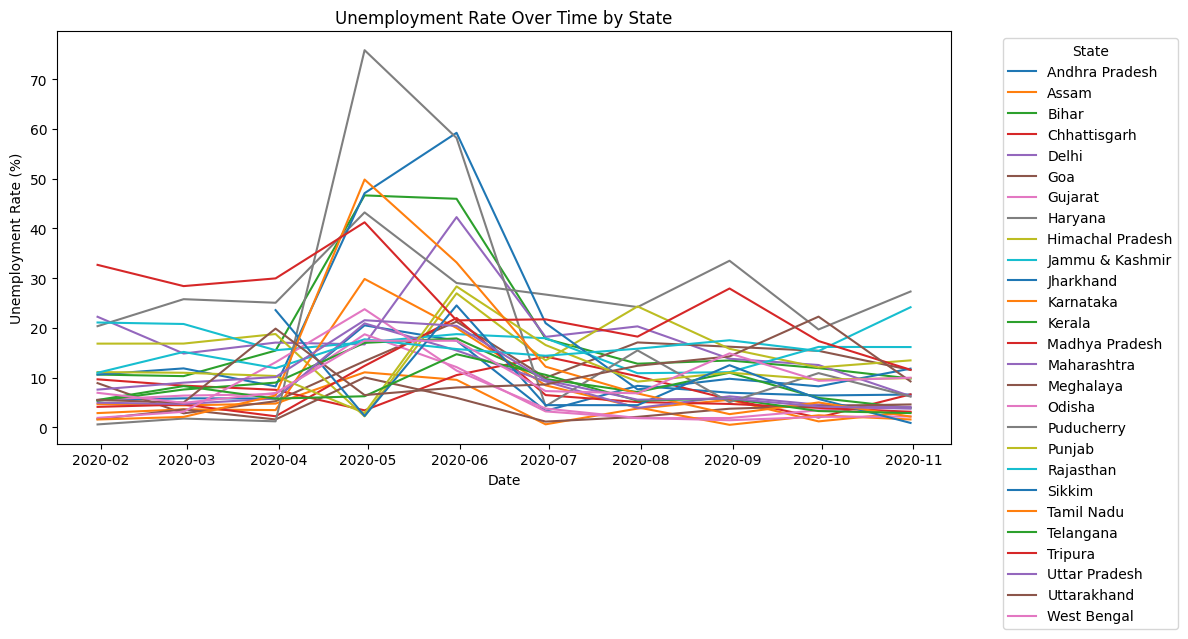

In [61]:
# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=data2, x='date', y='estimated_unemployment_rate_(%)', hue='state', palette='tab10')

# Add legend on the right side
plt.legend(
    title='State',
    bbox_to_anchor=(1.05, 1),  # Position legend outside the plot
    loc='upper left'
)

# Add titles and labels
plt.title('Unemployment Rate Over Time by State')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

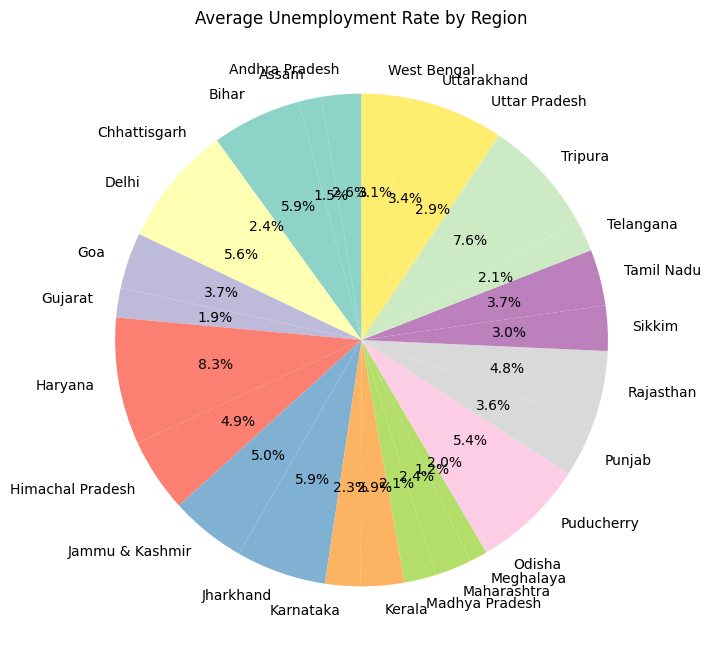

In [45]:
# Assuming data2 is already preprocessed and the 'region' column is categorical
region_unemployment_rate = data2.groupby('state')['estimated_unemployment_rate_(%)'].mean()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
region_unemployment_rate.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')

# Title and formatting
plt.title('Average Unemployment Rate by Region')
plt.ylabel('')  # Hide the ylabel
plt.show()

###2. Regional Analysis

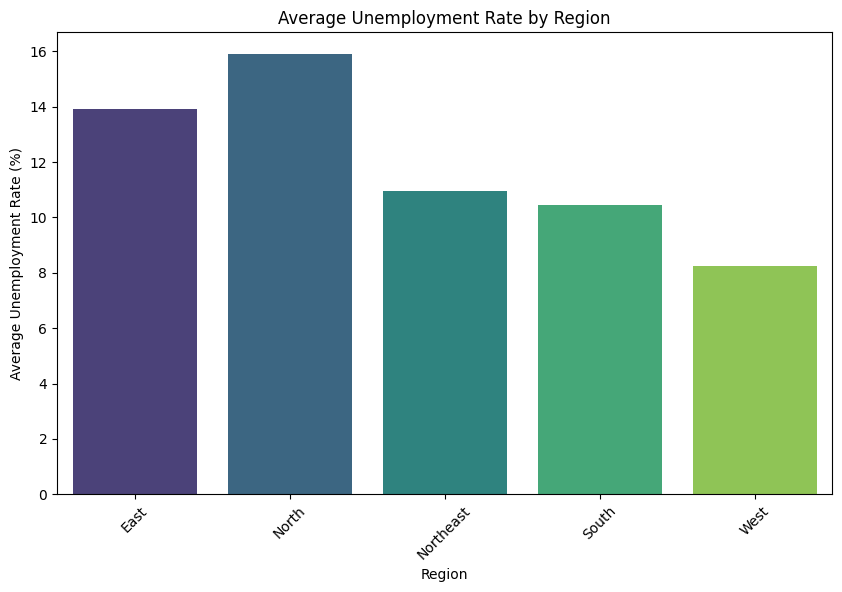

In [49]:
# Group by region and calculate the average unemployment rate
region_group = data2.groupby('region')['estimated_unemployment_rate_(%)'].mean().reset_index()

# Create a bar plot with 'hue' assigned to 'region' and turning off the legend
plt.figure(figsize=(10, 6))
sns.barplot(data=region_group, x='region', y='estimated_unemployment_rate_(%)', hue='region', palette='viridis', legend=False)

# Title and show the plot
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

###3. Area-wise Analysis

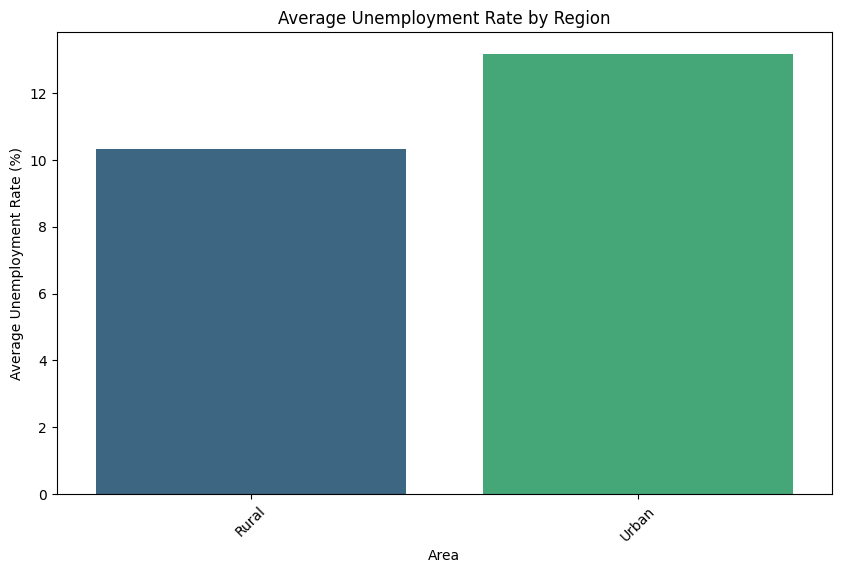

In [54]:
# Group by region and calculate the average unemployment rate
region_group = data1.groupby('area')['estimated_unemployment_rate_(%)'].mean().reset_index()

# Create a bar plot with 'hue' assigned to 'region' and turning off the legend
plt.figure(figsize=(10, 6))
sns.barplot(data=region_group, x='area', y='estimated_unemployment_rate_(%)', hue='area', palette='viridis', legend=False)

# Title and show the plot
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Area')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

###4. Heatmap of Unemployment by State

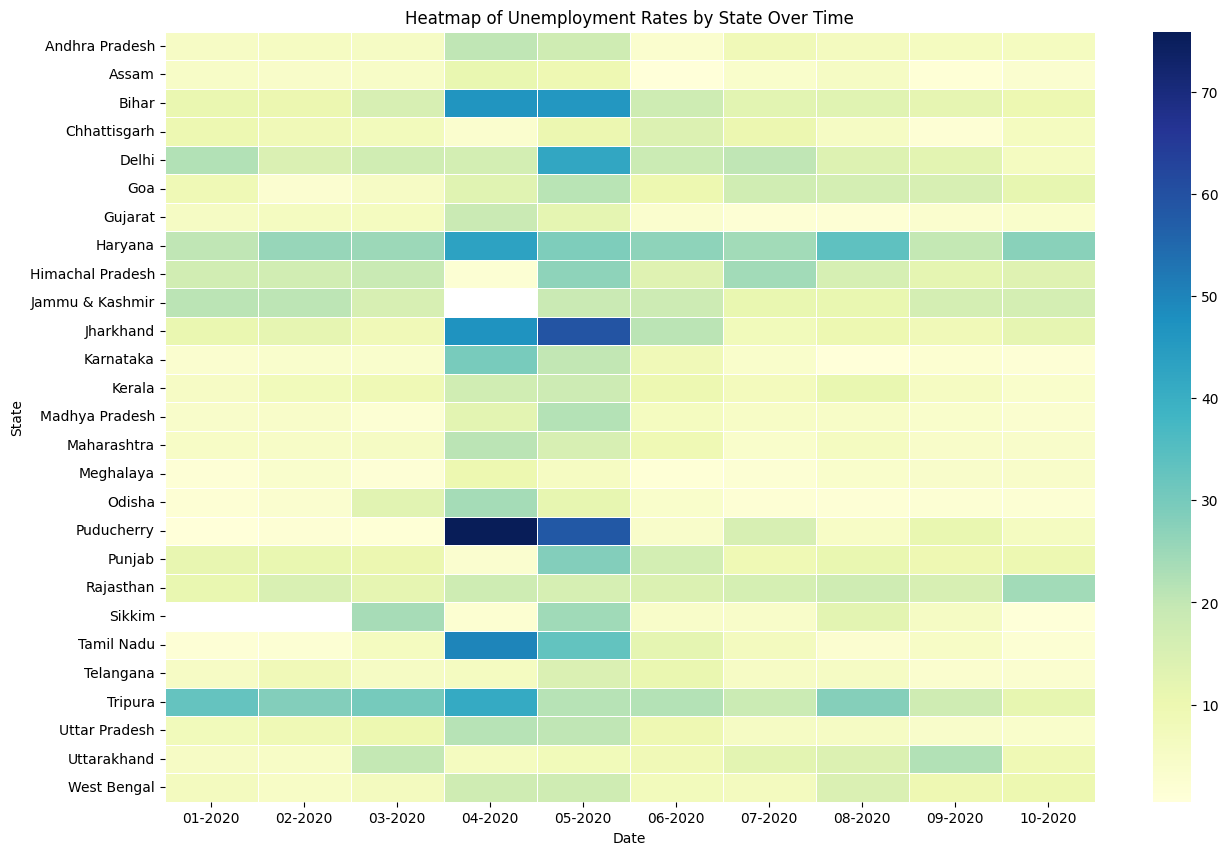

In [57]:
# Create pivot table
pivot_data = data2.pivot_table(index='state', columns='date', values='estimated_unemployment_rate_(%)')

# Format the dates in the pivot table columns to "DD-MM-YYYY"
pivot_data.columns = [col.strftime('%m-%Y') for col in pivot_data.columns]

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_data, cmap='YlGnBu', linewidths=0.5)

# Add title and show plot
plt.title('Heatmap of Unemployment Rates by State Over Time')
plt.xlabel('Date')
plt.ylabel('State')
plt.show()

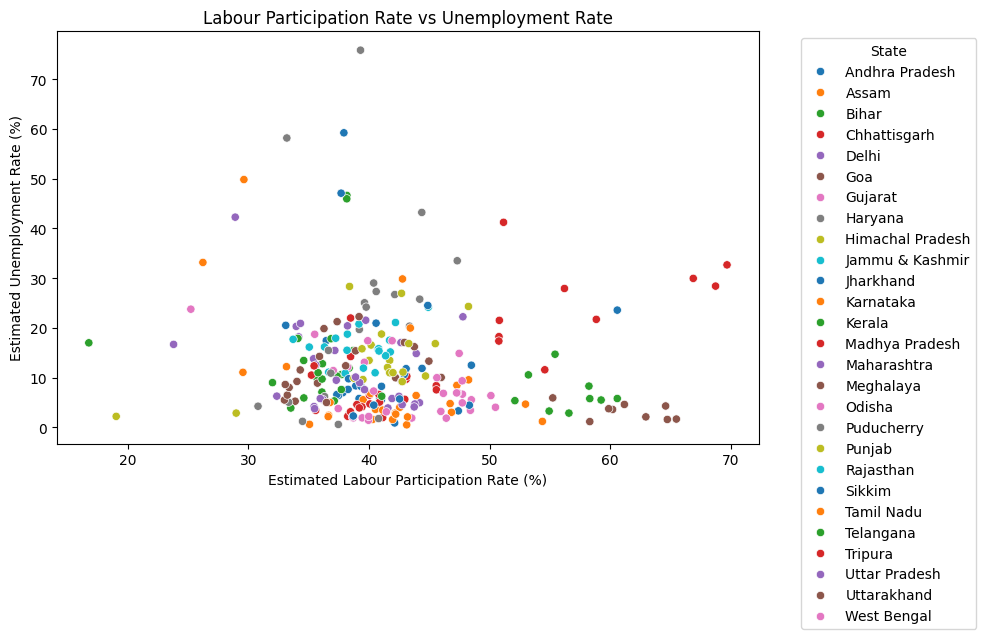

In [60]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data2,
    x='estimated_labour_participation_rate_(%)',
    y='estimated_unemployment_rate_(%)',
    hue='state',
    palette='tab10'
)

# Add legend on the right side
plt.legend(
    title='State',
    bbox_to_anchor=(1.05, 1),  # Position legend outside the plot
    loc='upper left'
)

# Add titles and labels
plt.title('Labour Participation Rate vs Unemployment Rate')
plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('Estimated Unemployment Rate (%)')

# Adjust layout to avoid clipping
plt.tight_layout()
plt.show()